# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print (cities)

['taolanaro', 'emerald', 'torbay', 'hobart', 'rikitea', 'mercedes', 'yellowknife', 'saint george', 'east london', 'monforte de lemos', 'port lincoln', 'flinders', 'hermanus', 'ushuaia', 'arraial do cabo', 'nyrob', 'fort frances', 'dauriya', 'bambous virieux', 'saint-philippe', 'salalah', 'krasnoyarskiy', 'yeppoon', 'erenhot', 'shizunai', 'karpogory', 'samusu', 'waipawa', 'vao', 'atuona', 'longyearbyen', 'sarkand', 'nemuro', 'georgetown', 'cherskiy', 'purranque', 'half moon bay', 'mataura', 'busselton', 'ixtapa', 'caravelas', 'vaitupu', 'juneau', 'vila velha', 'nikolskoye', 'castro', 'saldanha', 'morros', 'ayan', 'livramento', 'kisanga', 'provideniya', 'saint anthony', 'dongobesh', 'puerto ayora', 'jamestown', 'mar del plata', 'griffith', 'punta arenas', 'agadir', 'rabo de peixe', 'mayo', 'chokurdakh', 'port elizabeth', 'lorengau', 'batagay', 'abu dhabi', 'ilulissat', 'nanortalik', 'ribeira grande', 'ribeira brava', 'risor', 'oksfjord', 'avarua', 'san-pedro', 'watsa', 'nyanguge', 'ijaki

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [75]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
index_counter = 0
set_counter = 1



print("Beginning Data Retrieval ")
print("-----------------------------")

for index, city in enumerate (cities):
    
        response = requests.get(query_url + city).json()
        try:
            city_name.append(response['name'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            cloudiness.append(response['clouds']['all'])
            wind_speed.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            if index_counter > 49:
                index_counter = 0
                set_counter = set_counter + 1
    
            else:
                index_counter = index_counter + 1
            
                print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
        except(KeyError, IndexError):
            print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
            
        
        
    

Beginning Data Retrieval 
-----------------------------
City not found. Skipping...
Processing Record 1 of Set 1 : emerald
Processing Record 2 of Set 1 : torbay
Processing Record 3 of Set 1 : hobart
Processing Record 4 of Set 1 : rikitea
Processing Record 5 of Set 1 : mercedes
Processing Record 6 of Set 1 : yellowknife
Processing Record 7 of Set 1 : saint george
Processing Record 8 of Set 1 : east london
Processing Record 9 of Set 1 : monforte de lemos
Processing Record 10 of Set 1 : port lincoln
Processing Record 11 of Set 1 : flinders
Processing Record 12 of Set 1 : hermanus
Processing Record 13 of Set 1 : ushuaia
Processing Record 14 of Set 1 : arraial do cabo
Processing Record 15 of Set 1 : nyrob
Processing Record 16 of Set 1 : fort frances
Processing Record 17 of Set 1 : dauriya
Processing Record 18 of Set 1 : bambous virieux
Processing Record 19 of Set 1 : saint-philippe
Processing Record 20 of Set 1 : salalah
Processing Record 21 of Set 1 : krasnoyarskiy
Processing Record 22 of 

Processing Record 42 of Set 4 : san andres
Processing Record 43 of Set 4 : ratangarh
Processing Record 44 of Set 4 : sohag
Processing Record 45 of Set 4 : coronado
Processing Record 46 of Set 4 : naze
Processing Record 47 of Set 4 : nishihara
Processing Record 48 of Set 4 : huilong
Processing Record 49 of Set 4 : severo-kurilsk
Processing Record 50 of Set 4 : hualmay
Processing Record 1 of Set 5 : novosineglazovskiy
City not found. Skipping...
City not found. Skipping...
Processing Record 2 of Set 5 : zhigansk
Processing Record 3 of Set 5 : san ramon de la nueva oran
Processing Record 4 of Set 5 : barrow
Processing Record 5 of Set 5 : eyl
Processing Record 6 of Set 5 : santa lucia
Processing Record 7 of Set 5 : mangochi
Processing Record 8 of Set 5 : mount isa
Processing Record 9 of Set 5 : cairns
Processing Record 10 of Set 5 : alice springs
Processing Record 11 of Set 5 : thompson
Processing Record 12 of Set 5 : crib point
Processing Record 13 of Set 5 : hasaki
Processing Record 14 o

Processing Record 28 of Set 8 : meulaboh
Processing Record 29 of Set 8 : san cristobal
Processing Record 30 of Set 8 : victoria
Processing Record 31 of Set 8 : valdivia
City not found. Skipping...
Processing Record 32 of Set 8 : coper
Processing Record 33 of Set 8 : ndele
Processing Record 34 of Set 8 : kuusamo
Processing Record 35 of Set 8 : bom jesus
Processing Record 36 of Set 8 : balgarovo
Processing Record 37 of Set 8 : corovode
Processing Record 38 of Set 8 : mayumba
Processing Record 39 of Set 8 : abha
Processing Record 40 of Set 8 : den helder
Processing Record 41 of Set 8 : quipile
Processing Record 42 of Set 8 : bodden town
Processing Record 43 of Set 8 : cantilan
Processing Record 44 of Set 8 : kajaani
Processing Record 45 of Set 8 : tezu
City not found. Skipping...
Processing Record 46 of Set 8 : haines junction
Processing Record 47 of Set 8 : charagua
Processing Record 48 of Set 8 : mount gambier
Processing Record 49 of Set 8 : ahipara
Processing Record 50 of Set 8 : macha

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [76]:
city_weather = pd.DataFrame({'City': city_name, 'Lat' : lat, 'Lng': lng, 'Max Temp': max_temp, 'Humidity': humidity, 
                             'Cloudiness': cloudiness, 'Wind Speed': wind_speed, 'Country': country, 'Date': date
                            })
city_weather.head()
city_weather.to_csv("Output_data/cities.csv")

In [77]:
city_weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,19.464456,16.689278,57.781526,72.396491,61.026316,7.638105,1.636699e+09
std,33.222519,90.174297,23.917620,20.353139,38.806822,5.749584,8.705281e+01
min,-54.800000,-179.166700,-30.550000,12.000000,0.000000,0.000000,1.636699e+09
25%,-7.561525,-63.621775,40.367500,63.000000,20.000000,3.360000,1.636699e+09
50%,22.342750,22.167100,63.970000,77.000000,75.000000,6.310000,1.636699e+09
75%,47.502450,100.335400,77.222500,88.000000,100.000000,10.547500,1.636699e+09
max,78.218600,178.416700,96.780000,100.000000,100.000000,40.090000,1.636699e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [78]:
# max humidity is 100% as described in the above table.

In [79]:
#  Get the indices of cities that have humidity over 100%.


In [80]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

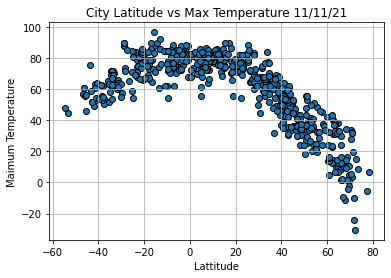

<Figure size 432x288 with 0 Axes>

In [81]:
plt.scatter(city_weather["Lat"], city_weather["Max Temp"], edgecolors = "black")
plt.xlabel("Lattitude")
plt.ylabel("Maimum Temperature")
plt.title("City Latitude vs Max Temperature 11/11/21")
plt.grid()
plt.show()

plt.savefig("Images/City_Latitude_vs_Temp.png")

In [ ]:
# Based on the scatter plot above, tempretaure reaches at its maximum arounf the equator (lat = 0) and as distance increases temperature dcreases.

## Latitude vs. Humidity Plot

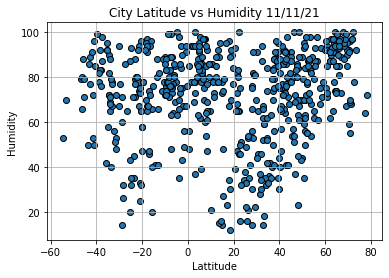

<Figure size 432x288 with 0 Axes>

In [82]:
plt.scatter(city_weather["Lat"], city_weather["Humidity"], edgecolors = "black")
plt.xlabel("Lattitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity 11/11/21")
plt.grid()
plt.show()

plt.savefig("Images/City_Latitude_vs_humid.png")

In [ ]:
# based on the graph above there is no specific correlation between lat and humidity and the plot is disperesed. 

## Latitude vs. Cloudiness Plot

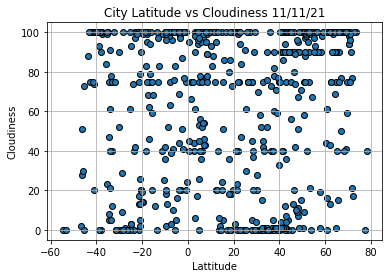

<Figure size 432x288 with 0 Axes>

In [83]:
plt.scatter(city_weather["Lat"], city_weather["Cloudiness"], edgecolors = "black")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness 11/11/21")
plt.grid()
plt.show()

plt.savefig("Images/City_Latitude_vs_cloud.png")

In [ ]:
# based on the graph above there is no specific correlation between lat and cloudiness and the plot is disperesed. 

## Latitude vs. Wind Speed Plot

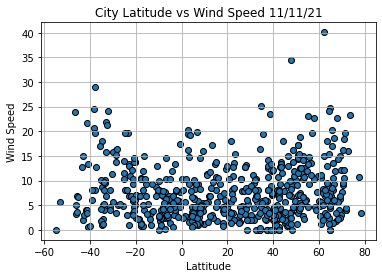

<Figure size 432x288 with 0 Axes>

In [84]:
plt.scatter(city_weather["Lat"], city_weather["Wind Speed"], edgecolors = "black")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Wind Speed 11/11/21")
plt.grid()
plt.show()

plt.savefig("Images/City_Latitude_vs_wind.png")

In [ ]:
# based on the graph above there is no specific correlation between lat and windspeed and the plot is disperesed.  

## Linear Regression

In [85]:
northern_hemisphere = city_weather.loc[city_weather["Lat"]>0]
southern_hemisphere= city_weather.loc[city_weather["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

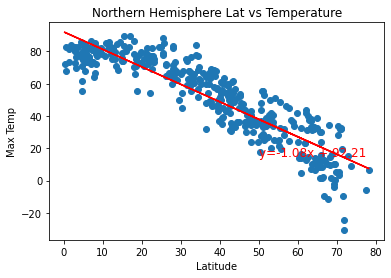

The rvalue is: -0.897495774364464


<Figure size 432x288 with 0 Axes>

In [86]:
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere Lat vs Temperature")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(50,15),fontsize=12,color="red")
plt.show()
print (f"The rvalue is: {rvalue}")

plt.savefig("Images/north_hemis_vs_temp.png")

In [ ]:
#based on the plot above there is a negative and strong correlation between max temp. As lat increases max temp decreases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

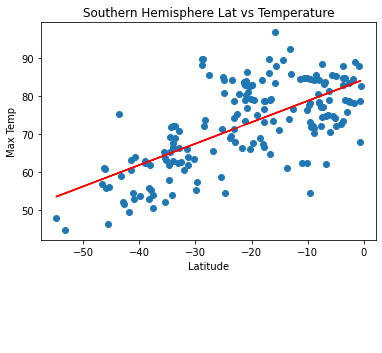

The rvalue is: 0.672001299252977


<Figure size 432x288 with 0 Axes>

In [87]:
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])
x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere Lat vs Temperature")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(-20,15),fontsize=12,color="red")
plt.show()
print (f"The rvalue is: {rvalue}")

plt.savefig("Images/south_hemis_vs_temp.png")

In [ ]:
#based on the plot above there is a positive and relatively strong correlation between max temp. As lat increases towards the equator max temp also increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

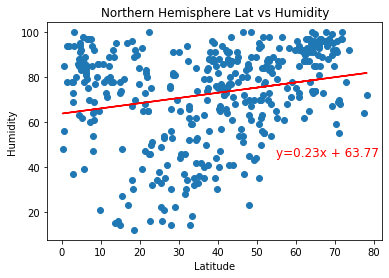

The rvalue is: 0.2282393070417993


<Figure size 432x288 with 0 Axes>

In [88]:
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere Lat vs Humidity")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (55,45),fontsize=12,color="red")
plt.show()
print (f"The rvalue is: {rvalue}")

plt.savefig("Images/north_hemis_vs_humid.png")

In [ ]:
#based on the plot above there is a weak positive correlation between humidity and lat in northern hemipsphere. As last increases humidity also increases slightly.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

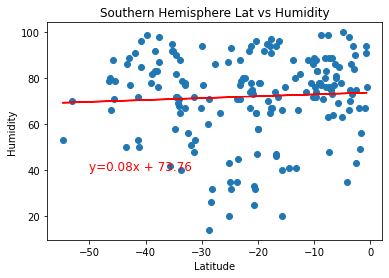

The rvalue is: 0.05822348577546963


<Figure size 432x288 with 0 Axes>

In [89]:
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere Lat vs Humidity")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (-50,40),fontsize=12,color="red")
plt.show()
print (f"The rvalue is: {rvalue}")

plt.savefig("Images/south_hemis_vs_humid.png")

In [ ]:
#based on the plot above there is no correlation between humidity and lat in southern hemipsphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

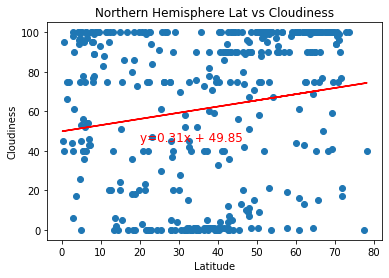

The rvalue is: 0.16785779710576007


<Figure size 432x288 with 0 Axes>

In [90]:
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere Lat vs Cloudiness")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (20,45),fontsize=12,color="red")
plt.show()
print (f"The rvalue is: {rvalue}")

plt.savefig("Images/north_hemis_vs_cloud.png")

In [ ]:
#based on the plot above there is a weak positive correlation between cloudiness and lat in northern hemipsphere. As last increases cloudiness also increases slightly.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

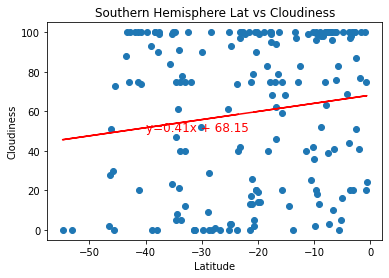

The rvalue is: 0.14221806744376145


<Figure size 432x288 with 0 Axes>

In [91]:
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere Lat vs Cloudiness")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (-40,50),fontsize=12,color="red")
plt.show()
print (f"The rvalue is: {rvalue}")

plt.savefig("Images/south_hemis_vs_cloud.png")

In [ ]:
#based on the plot above there is a weak positive correlation between cloudiness and lat in southern hemipsphere. As last increases cloudiness also increases slightly.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

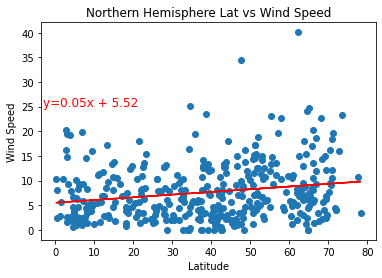

The rvalue is: 0.19709559635704452


<Figure size 432x288 with 0 Axes>

In [97]:
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere Lat vs Wind Speed")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (-3,25),fontsize=12,color="red")
plt.show()
print (f"The rvalue is: {rvalue}")

plt.savefig("Images/north_hemis_vs_wind.png")

In [ ]:
#based on the plot above there is no correlation between wind speed and lat in northern hemipsphere. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

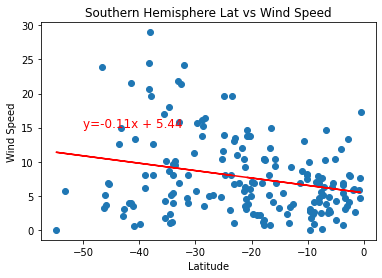

The rvalue is: -0.2557053033252547


<Figure size 432x288 with 0 Axes>

In [95]:
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere Lat vs Wind Speed")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (-50,15),fontsize=12,color="red")
plt.show()
print (f"The rvalue is: {rvalue}")

plt.savefig("Images/south_hemis_vs_wind.png")

In [ ]:
#based on the plot above there is a weak negative correlation between wind speed and lat in southern hemipsphere. 